<a href="https://colab.research.google.com/github/maiaragoudapatil-art/Sentimental-Analysis/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import re

def analyze_mixed_sentiment(text):
    # Split text into clauses using common conjunctions
    clauses = re.split(r'(but|however|although|though|yet|still|nevertheless)', text, flags=re.IGNORECASE)
    clauses = [clause.strip() for clause in clauses if clause.strip()]

    positive_clauses = []
    negative_clauses = []
    neutral_clauses = []

    print("🔍 Analyzing individual clauses...")
    print("-" * 50)

    for i, clause in enumerate(clauses, 1):
        analysis = TextBlob(clause)
        polarity = analysis.sentiment.polarity

        if polarity > 0.1:
            positive_clauses.append((clause, polarity))
            print(f"Clause {i}:  Positive (score: {polarity:.2f})")
            print(f"   '{clause}'")
        elif polarity < -0.1:
            negative_clauses.append((clause, polarity))
            print(f"Clause {i}:  Negative (score: {polarity:.2f})")
            print(f"   '{clause}'")
        else:
            neutral_clauses.append((clause, polarity))
            print(f"Clause {i}:  Neutral (score: {polarity:.2f})")
            print(f"   '{clause}'")
        print()

    return positive_clauses, negative_clauses, neutral_clauses

def get_overall_sentiment(positive, negative, neutral):
    if positive and negative:
        return "Mixed"
    elif positive:
        return "Positive"
    elif negative:
        return "Negative"
    else:
        return "Neutral"

print("=== Advanced Clause-based Sentiment Analyzer ===")
print("This analyzer detects mixed emotions by separating clauses!")
print("=" * 60)

text = input("Enter your text: ")

# Analyze individual clauses
positive, negative, neutral = analyze_mixed_sentiment(text)

# Get overall result
overall_sentiment = get_overall_sentiment(positive, negative, neutral)

print("=" * 60)
print("FINAL ANALYSIS:")
print(f"Overall Sentiment: {overall_sentiment}")
print(f" Positive clauses: {len(positive)}")
print(f" Negative clauses: {len(negative)}")
print(f" Neutral clauses: {len(neutral)}")

# Display detailed breakdown
if positive:
    print("\n POSITIVE PARTS:")
    for i, (clause, score) in enumerate(positive, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

if negative:
    print("\n NEGATIVE PARTS:")
    for i, (clause, score) in enumerate(negative, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

if neutral:
    print("\n NEUTRAL PARTS:")
    for i, (clause, score) in enumerate(neutral, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

# Final interpretation
print(f"\n🎭 FINAL VERDICT: This text is {overall_sentiment.upper()}")
if overall_sentiment == "Mixed":
    print("   It contains both positive and negative emotions!")
elif overall_sentiment == "Positive":
    print("   Overall positive feeling! 😊")
elif overall_sentiment == "Negative":
    print("   Overall negative feeling! 😔")
else:
    print("   The text is mostly neutral! 😐")

=== Advanced Clause-based Sentiment Analyzer ===
This analyzer detects mixed emotions by separating clauses!
Enter your text: i am very sad
🔍 Analyzing individual clauses...
--------------------------------------------------
Clause 1:  Negative (score: -0.65)
   'i am very sad'

FINAL ANALYSIS:
Overall Sentiment: Negative
 Positive clauses: 0
 Negative clauses: 1
 Neutral clauses: 0

 NEGATIVE PARTS:
   1. 'i am very sad' (score: -0.65)

🎭 FINAL VERDICT: This text is NEGATIVE
   Overall negative feeling! 😔


Sample Data:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  

After Sentiment Analysis:
                                                text Sentiment
0                I`d have responded, if I were going   Neutral
1      Sooo SAD I will miss you here in San Diego!!!  Negative
2                          my boss is bullying me...   N

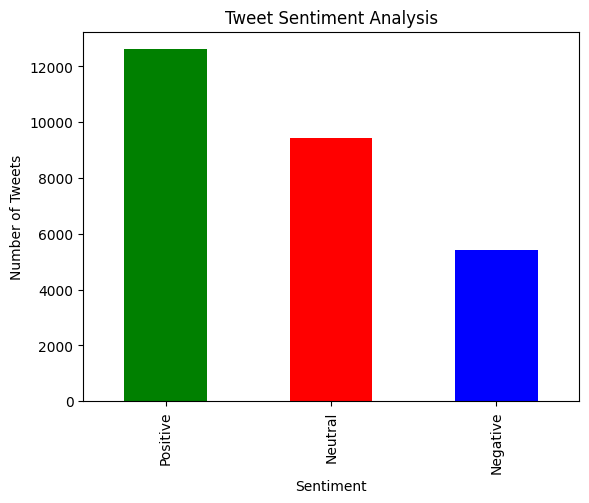

In [ ]:
# 📌 Step 1: Install TextBlob if not already installed
!pip install textblob

# 📌 Step 2: Import required libraries
import pandas as pd
from textblob import TextBlob

# 📌 Step 3: Load the dataset
file_path = '/content/Tweets.csv'  # your file path
df = pd.read_csv(file_path)

# Display the first few rows to check the structure
print("Sample Data:")
print(df.head())

# 📌 Step 4: Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# 📌 Step 5: Apply sentiment analysis on the tweet column
# ⚠️ Replace 'text' with the actual column name containing tweets in your CSV
df['Sentiment'] = df['text'].apply(get_sentiment)

# 📌 Step 6: View results
print("\nAfter Sentiment Analysis:")
print(df[['text', 'Sentiment']].head())

# 📌 Step 7: Count each sentiment type
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Counts:")
print(sentiment_counts)

# 📌 Step 8: Optional — Plot results
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Tweet Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [ ]:
# 📌 Step 1: Install TextBlob if not already installed
!pip install textblob

# 📌 Step 2: Import required libraries
import pandas as pd
from textblob import TextBlob
import re
import os

# 📌 Step 3: Load the dataset
file_path = '/content/Tweets.csv'  # your file path
df = pd.read_csv(file_path)

# Create a counter file to track which tweet to analyze next
counter_file = 'tweet_counter.txt'

def get_next_tweet_index():
    """Get the next tweet index to analyze"""
    if os.path.exists(counter_file):
        with open(counter_file, 'r') as f:
            index = int(f.read().strip())
    else:
        index = 0

    # If we've reached the end of dataset, reset to 0
    if index >= len(df):
        index = 0

    return index

def update_tweet_index(index):
    """Update the counter for next run"""
    with open(counter_file, 'w') as f:
        f.write(str(index + 1))

def analyze_mixed_sentiment(text):
    # Split text into clauses using common conjunctions
    text = str(text)
    clauses = re.split(r'(but|however|although|though|yet|still|nevertheless)', text, flags=re.IGNORECASE)
    clauses = [clause.strip() for clause in clauses if clause.strip() and len(clause.strip()) > 5]

    positive_clauses = []
    negative_clauses = []
    neutral_clauses = []

    for i, clause in enumerate(clauses, 1):
        analysis = TextBlob(clause)
        polarity = analysis.sentiment.polarity

        if polarity > 0.1:
            positive_clauses.append((clause, polarity))
        elif polarity < -0.1:
            negative_clauses.append((clause, polarity))
        else:
            neutral_clauses.append((clause, polarity))

    return positive_clauses, negative_clauses, neutral_clauses

def get_overall_sentiment(positive, negative, neutral):
    if positive and negative:
        return "Mixed"
    elif positive:
        return "Positive"
    elif negative:
        return "Negative"
    else:
        return "Neutral"

# 📌 Step 4: Get the next tweet to analyze
current_index = get_next_tweet_index()
tweet = df.iloc[current_index]['text']

print("=" * 80)
print(f"📊 ANALYZING TWEET {current_index + 1} OF {len(df)}")
print("=" * 80)
print(f"Original Tweet: '{tweet}'")
print("-" * 80)

# Analyze the tweet
positive, negative, neutral = analyze_mixed_sentiment(tweet)
overall_sentiment = get_overall_sentiment(positive, negative, neutral)

print(f"🎭 OVERALL SENTIMENT: {overall_sentiment}")
print(f"✅ Positive clauses: {len(positive)}")
print(f"❌ Negative clauses: {len(negative)}")
print(f"⚪ Neutral clauses: {len(neutral)}")

# Display detailed breakdown
if positive:
    print("\n✅ POSITIVE PARTS:")
    for i, (clause, score) in enumerate(positive, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

if negative:
    print("\n❌ NEGATIVE PARTS:")
    for i, (clause, score) in enumerate(negative, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

if neutral:
    print("\n⚪ NEUTRAL PARTS:")
    for i, (clause, score) in enumerate(neutral, 1):
        print(f"   {i}. '{clause}' (score: {score:.2f})")

# Final interpretation
print(f"\n🎯 FINAL VERDICT: This tweet is {overall_sentiment.upper()}")
if overall_sentiment == "Mixed":
    print("   💡 Contains both positive and negative emotions!")
elif overall_sentiment == "Positive":
    print("   😊 Overall positive feeling!")
elif overall_sentiment == "Negative":
    print("   😔 Overall negative feeling!")
else:
    print("   😐 The tweet is mostly neutral!")

print("=" * 80)
print(f"📈 PROGRESS: {current_index + 1}/{len(df)} tweets analyzed")
print("=" * 80)

# 📌 Step 5: Update counter for next run
update_tweet_index(current_index)

# 📌 Step 6: Show when all tweets are done
if current_index + 1 >= len(df):
    print("\n🎉 COMPLETION STATUS: All tweets have been analyzed!")
    print("   Next run will start from the beginning.")
else:
    print(f"\n⏭️  NEXT: Run again to analyze tweet {current_index + 2}")


📊 ANALYZING TWEET 2 OF 27481
Original Tweet: ' Sooo SAD I will miss you here in San Diego!!!'
--------------------------------------------------------------------------------
🎭 OVERALL SENTIMENT: Negative
✅ Positive clauses: 0
❌ Negative clauses: 1
⚪ Neutral clauses: 0

❌ NEGATIVE PARTS:
   1. 'Sooo SAD I will miss you here in San Diego!!!' (score: -0.98)

🎯 FINAL VERDICT: This tweet is NEGATIVE
   😔 Overall negative feeling!
📈 PROGRESS: 2/27481 tweets analyzed

⏭️  NEXT: Run again to analyze tweet 3
